# Alzheimer's disease prediction







## Adding Imports

In [1]:
import pandas as pd # used to load, manipulate the data
from sklearn.model_selection import train_test_split ## for splitting the dataset into train and test split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

## Load Data

longitudinal Magnetic Resonance Imaging (MRI) data from OASIS.

In [2]:
data = pd.read_csv('oasis_longitudinal.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


## Analysing the data

The dataset has been analyzed for any categorical values.

In [3]:
#data = data.loc[data['Visit']==1] #use first visit data only because of the analysis we're doing
#data = data.reset_index(drop=True) #reset index after filtering first visit data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


## Converting Categorical Data to Numerical Data

gender and group attribute columnsare converted into numeric values 0 and 1. 

In [4]:
data['M/F'] = data['M/F'].apply(lambda x: 0 if x == 'F' else 1) #0 for F
data['Group'] = data['Group'].apply(lambda x: 0 if x == 'Nondemented' else 1) #0 for Nondemented
data.rename(columns={'M/F':'Gender'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Gender      373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


## Correlation matrix

the correlation between attributes has been checked by using the “correlation matrix” function based on group attributes. 

In [5]:
correlation_matrix = data.corr()
data_corr = correlation_matrix['Group'].sort_values(ascending=False)
data_corr

Group       1.000000
CDR         0.778049
Gender      0.222146
SES         0.062463
ASF         0.032495
Age        -0.005941
eTIV       -0.042700
Visit      -0.095507
MR Delay   -0.120638
EDUC       -0.193060
nWBV       -0.311346
MMSE       -0.524775
Name: Group, dtype: float64

## Checking for any null or missing values.

The median value is used to fill in those missing values for features.

In [6]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Gender         0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
SES=data['SES'].median()
MMSE=data['MMSE'].median()
data['SES'] = data['SES'].fillna(SES)
data['MMSE'] = data['MMSE'].fillna(MMSE)
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
Gender        0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Drop unnecessary columns

In [8]:
data = data.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Hand'], axis=1) 
data

,Group,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


## Assign the features and the target value.

X = the features for making the prediction.
y = the target value set so that the model can predict.

In [9]:
y = data['Group']
X = data.drop(['Group', 'ASF'], axis=1)

## Split the dataset

stratified sampling has been applied with atraining-validation size of 80% and a testing size of 20%.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

## Scale the dataset

standardization has been applied.The result of standardization is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.

In [11]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Visualization

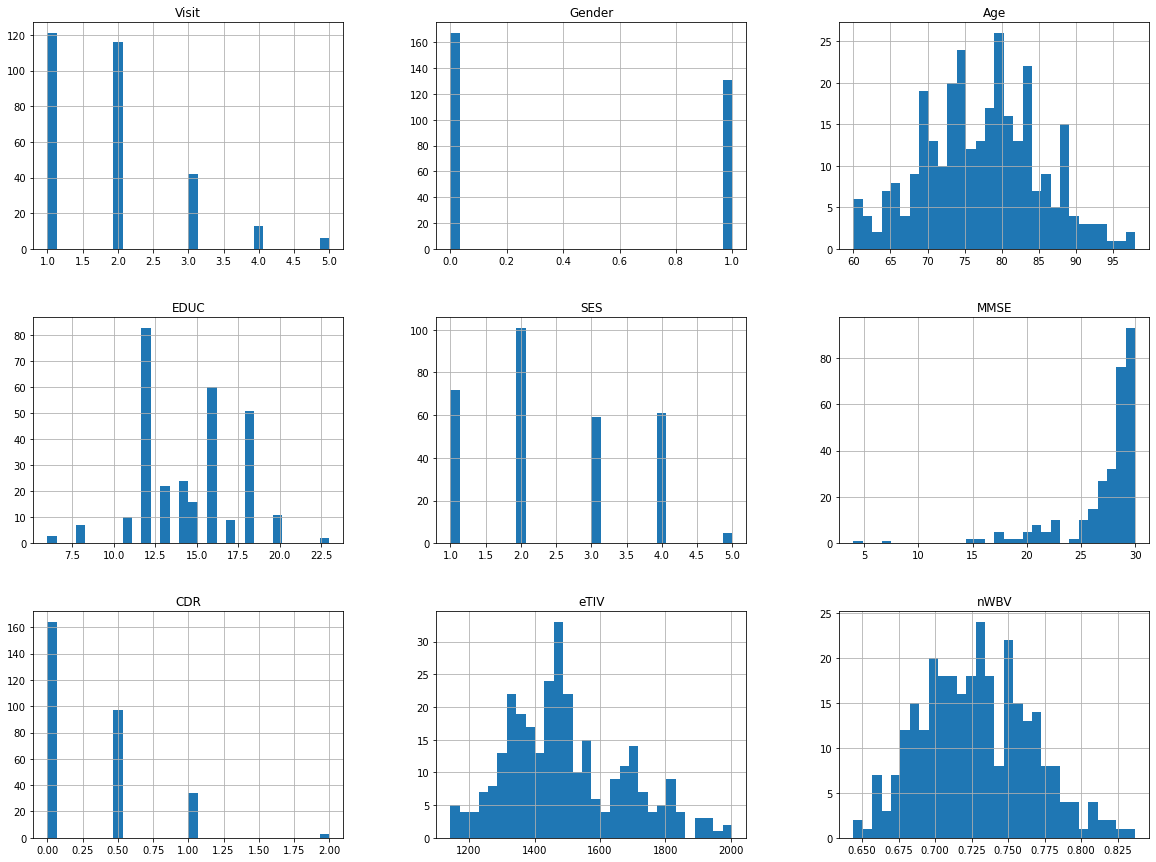

In [12]:
#Histogram
X_train.hist(bins=30, figsize=(20,15))
plt.show()

shows the histogram of the training and validation set. Histogram portrays the ratios of the dataset.

array([[<AxesSubplot:xlabel='Group', ylabel='Group'>,
        <AxesSubplot:xlabel='CDR', ylabel='Group'>,
        <AxesSubplot:xlabel='Gender', ylabel='Group'>,
        <AxesSubplot:xlabel='SES', ylabel='Group'>,
        <AxesSubplot:xlabel='ASF', ylabel='Group'>],
       [<AxesSubplot:xlabel='Group', ylabel='CDR'>,
        <AxesSubplot:xlabel='CDR', ylabel='CDR'>,
        <AxesSubplot:xlabel='Gender', ylabel='CDR'>,
        <AxesSubplot:xlabel='SES', ylabel='CDR'>,
        <AxesSubplot:xlabel='ASF', ylabel='CDR'>],
       [<AxesSubplot:xlabel='Group', ylabel='Gender'>,
        <AxesSubplot:xlabel='CDR', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='SES', ylabel='Gender'>,
        <AxesSubplot:xlabel='ASF', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Group', ylabel='SES'>,
        <AxesSubplot:xlabel='CDR', ylabel='SES'>,
        <AxesSubplot:xlabel='Gender', ylabel='SES'>,
        <AxesSubplot:xlabel='SES', ylabel='SES'>,
  

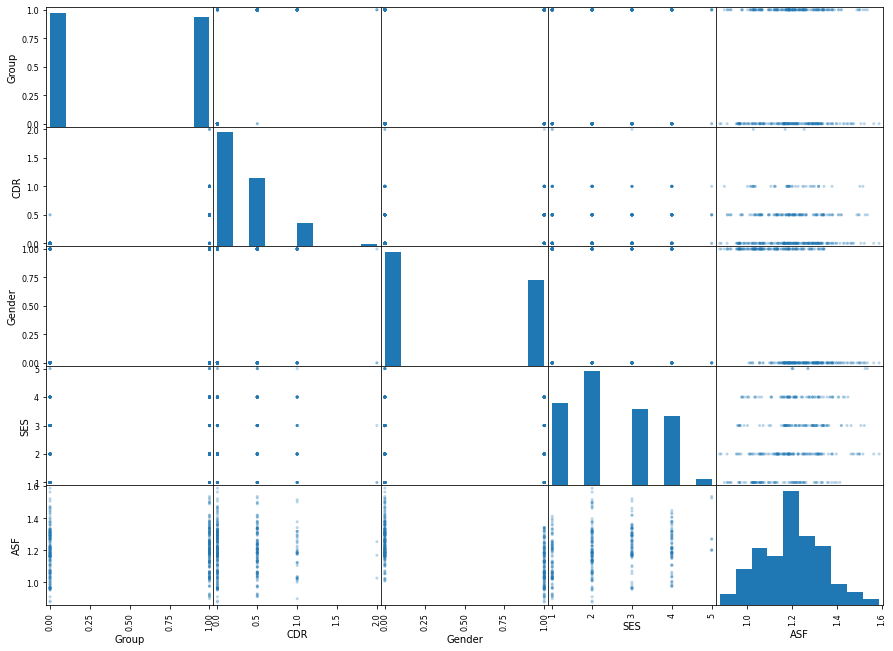

In [13]:
#Correlation Matrix
attributes = ["Group", "CDR", "Gender", "SES", "ASF"]
scatter_matrix(data[attributes], figsize=(15, 11), alpha=0.3)

shows the correlation matrix of the features in the dataset. the correlation matrix indicates how features are interrelated with each other.

# Models

## Support vector machine

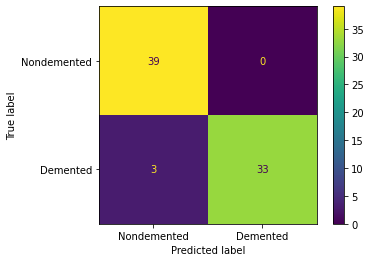

In [14]:
from sklearn.svm import SVC
svm = SVC().fit(X_train_scaled, y_train)
plot_confusion_matrix(svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [15]:
acc_svm = 0
train_score = 0
test_score = 0
test_precision = 0
test_recall = 0
F1_Score = 0
test_auc = 0

train_score = svm.score(X_train_scaled, y_train)
test_score = svm.score(X_test_scaled, y_test)
y_predict = svm.predict(X_test_scaled)

test_precision = precision_score(y_test, y_predict, pos_label=1)
test_recall = recall_score(y_test, y_predict, pos_label=1)
F1_Score = f1_score(y_test, y_predict, pos_label=1)

svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(svm_fpr, svm_tpr)

acc_svm = accuracy_score(y_test, y_predict)
print('Accuracy: {:.2%} '.format(acc_svm))

#print("Train accuracy ", train_score)
#print("Test accuracy ", test_score)

print('Test precision: {:.2%} '.format(test_precision))
print('Test recall: {:.2%} '.format(test_recall))
print('Test F1: {:.2%} '.format(F1_Score))
print('Test AUC: {:.2%} '.format(test_auc))

Accuracy: 96.00% 
Test precision: 100.00% 
Test recall: 91.67% 
Test F1: 95.65% 
Test AUC: 95.83% 


## Logistic Regression

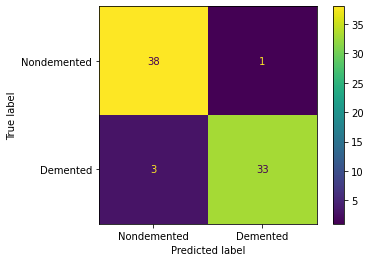

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train_scaled, y_train)
plot_confusion_matrix(log_reg, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [17]:
acc_lg = 0
train_score = 0
test_score = 0
test_precision = 0
test_recall = 0
F1_Score = 0
test_auc = 0

train_score = log_reg.score(X_train_scaled, y_train)
test_score = log_reg.score(X_test_scaled, y_test)
y_predict = log_reg.predict(X_test_scaled)

test_precision = precision_score(y_test, y_predict, pos_label=1)
test_recall = recall_score(y_test, y_predict, pos_label=1)
F1_Score = f1_score(y_test, y_predict, pos_label=1)

lgr_fpr, lgr_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(lgr_fpr, lgr_tpr)

acc_lg = accuracy_score(y_test, y_predict)
print('Accuracy: {:.2%} '.format(acc_lg))

#print("Train accuracy ", train_score)
#print("Test accuracy ", test_score)

print('Test precision: {:.2%} '.format(test_precision))
print('Test recall: {:.2%} '.format(test_recall))
print('Test F1: {:.2%} '.format(F1_Score))
print('Test AUC: {:.2%} '.format(test_auc))

Accuracy: 94.67% 
Test precision: 97.06% 
Test recall: 91.67% 
Test F1: 94.29% 
Test AUC: 94.55% 


## Decision Tree

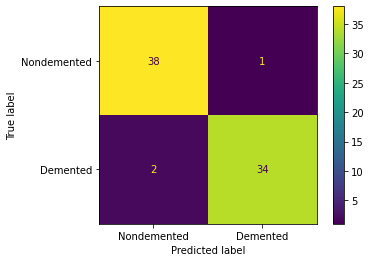

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train_scaled, y_train)
plot_confusion_matrix(dt, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [19]:
acc_ds = 0
train_score = 0
test_score = 0
test_precision = 0
test_recall = 0
F1_Score = 0
test_auc = 0

train_score = dt.score(X_train_scaled, y_train)
test_score = dt.score(X_test_scaled, y_test)
y_predict = dt.predict(X_test_scaled)

test_precision = precision_score(y_test, y_predict, pos_label=1)
test_recall = recall_score(y_test, y_predict, pos_label=1)
F1_Score = f1_score(y_test, y_predict, pos_label=1)

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(dt_fpr, dt_tpr)

acc_ds = accuracy_score(y_test, y_predict)
print('Accuracy: {:.2%} '.format(acc_ds))

#print("Train accuracy ", train_score)
#print("Test accuracy ", test_score)

print('Test precision: {:.2%} '.format(test_precision))
print('Test recall: {:.2%} '.format(test_recall))
print('Test F1: {:.2%} '.format(F1_Score))
print('Test AUC: {:.2%} '.format(test_auc))

Accuracy: 96.00% 
Test precision: 97.14% 
Test recall: 94.44% 
Test F1: 95.77% 
Test AUC: 95.94% 


## Random Forest

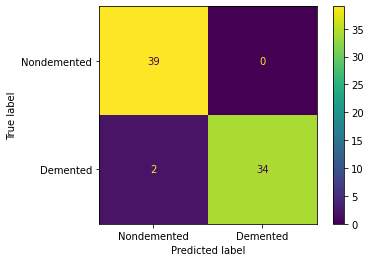

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train_scaled, y_train)
plot_confusion_matrix(rf, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [21]:
acc_rf = 0
train_score = 0
test_score = 0
test_precision = 0
test_recall = 0
F1_Score = 0
test_auc = 0

train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)
y_predict = rf.predict(X_test_scaled)

test_precision = precision_score(y_test, y_predict, pos_label=1)
test_recall = recall_score(y_test, y_predict, pos_label=1)
F1_Score = f1_score(y_test, y_predict, pos_label=1)

rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(rfc_fpr, rfc_tpr)

acc_rf = accuracy_score(y_test, y_predict)
print('Accuracy: {:.2%} '.format(acc_rf))

#print("Train accuracy ", train_score)
#print("Test accuracy ", test_score)

print('Test precision: {:.2%} '.format(test_precision))
print('Test recall: {:.2%} '.format(test_recall))
print('Test F1: {:.2%} '.format(F1_Score))
print('Test AUC: {:.2%} '.format(test_auc))

Accuracy: 97.33% 
Test precision: 100.00% 
Test recall: 94.44% 
Test F1: 97.14% 
Test AUC: 97.22% 


## Bar chart of Classifiers 

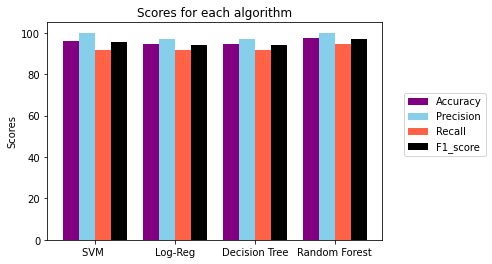

In [22]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(4)
width = 0.20
fig, ax = plt.subplots()

accu = [96.00, 94.67, 94.67, 97.33]
rects1 = ax.bar(ind, accu, width, color='purple')
prec = [100.00, 97.06, 97.06, 100.00]
rects2 = ax.bar(ind+width, prec, width, color='skyblue')
rec = [91.67, 91.67, 91.67, 94.44]
rects3 = ax.bar(ind + 2 * width, rec, width, color='tomato')
f1 = [95.65, 94.29, 94.29, 97.14]
rects4 = ax.bar(ind + 3 * width, f1, width, color='black')

ax.set_ylabel('Scores')
ax.set_title('Scores for each algorithm')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('SVM ', 'Log-Reg', 'Decision Tree', 'Random Forest'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),
          ('Accuracy', 'Precision', 'Recall', 'F1_score'),
          bbox_to_anchor = (1.05, 0.7))


plt.show()

## Plot ROC and compare AUC

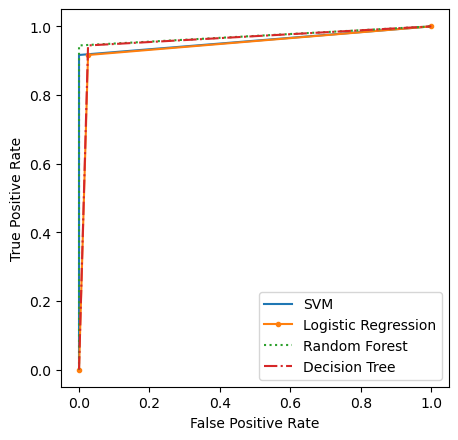

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM')
plt.plot(lgr_fpr, lgr_tpr, marker='.', label='Logistic Regression')
plt.plot(rfc_fpr, rfc_tpr, linestyle=':', label='Random Forest')
plt.plot(dt_fpr, dt_tpr, linestyle='-.', label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## cross validation

5-fold cross-validation has been applied to evaluate all possible combinations.

In [24]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score ,StratifiedKFold
# create dataset
X, y = make_classification(n_samples=373, n_features=8, n_informative=6, n_redundant=2, random_state=1)
# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5)

In [25]:
# create model
model = SVC()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("StratifiedKFold_SVM\n")
print("Cross Validation Scores are {}".format(scores))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

StratifiedKFold_SVM

Cross Validation Scores are [0.96       0.90666667 0.94666667 0.94594595 0.95945946]
Accuracy: 0.944 (0.019)


In [26]:
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("StratifiedKFold_LogisticRegression\n")
print("Cross Validation Scores are {}".format(scores))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

StratifiedKFold_LogisticRegression

Cross Validation Scores are [0.85333333 0.92       0.96       0.90540541 0.94594595]
Accuracy: 0.917 (0.037)


In [27]:
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("StratifiedKFold_DecisionTreeClassifier\n")
print("Cross Validation Scores are {}".format(scores))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

StratifiedKFold_DecisionTreeClassifier

Cross Validation Scores are [0.88       0.89333333 0.94666667 0.93243243 0.86486486]
Accuracy: 0.903 (0.031)


In [28]:
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("StratifiedKFold_RandomForestClassifier\n")
print("Cross Validation Scores are {}".format(scores))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

StratifiedKFold_RandomForestClassifier

Cross Validation Scores are [0.96       0.94666667 0.94666667 0.94594595 0.97297297]
Accuracy: 0.954 (0.011)
